<a href="https://colab.research.google.com/github/DrAdamDev/ETL-pipeline-for-UK-Employment-data/blob/main/Noise_Removal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
from numpy.random.mtrand import normal

In [93]:
image_upload = files.upload()

Saving LeHavre.jpg to LeHavre.jpg


In [ ]:
# CONVERT BYTE DATA TO CV2 IMAGE AND CONVERT TO RGB

In [94]:
byte_data = np.frombuffer(image_upload['LeHavre.jpg'], np.uint8)
image = cv2.imdecode(byte_data, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
# ADD SYNTHETIC NOISE TO THE IMAGE

In [95]:
mean = 0
stddev = 5
noise = np.random.normal(mean, stddev, image.shape)
noisy_image = np.add(image, noise).astype(np.uint8)

In [ ]:
# IMPLEMENT MEAN, MEDIAN AND GAUSSIAN FILTERING

In [159]:
# Define mean filter kernel
kernel_size = 3
mean_filter_kernel = np.ones((kernel_size, kernel_size),
                 dtype=np.float32) / kernel_size ** 2

# Define sharpening kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

mean_filtered_image = cv2.filter2D(noisy_image, -1, mean_filter_kernel)

Gaussian_filtered_image = cv2.GaussianBlur(noisy_image, (17, 17), 5)

median_filtered_image = cv2.medianBlur(noisy_image, 21)

sharpened = cv2.filter2D(median_filtered_image, -1, kernel)

In [ ]:
# SHOW RESULTS

(-0.5, 4031.5, 3023.5, -0.5)

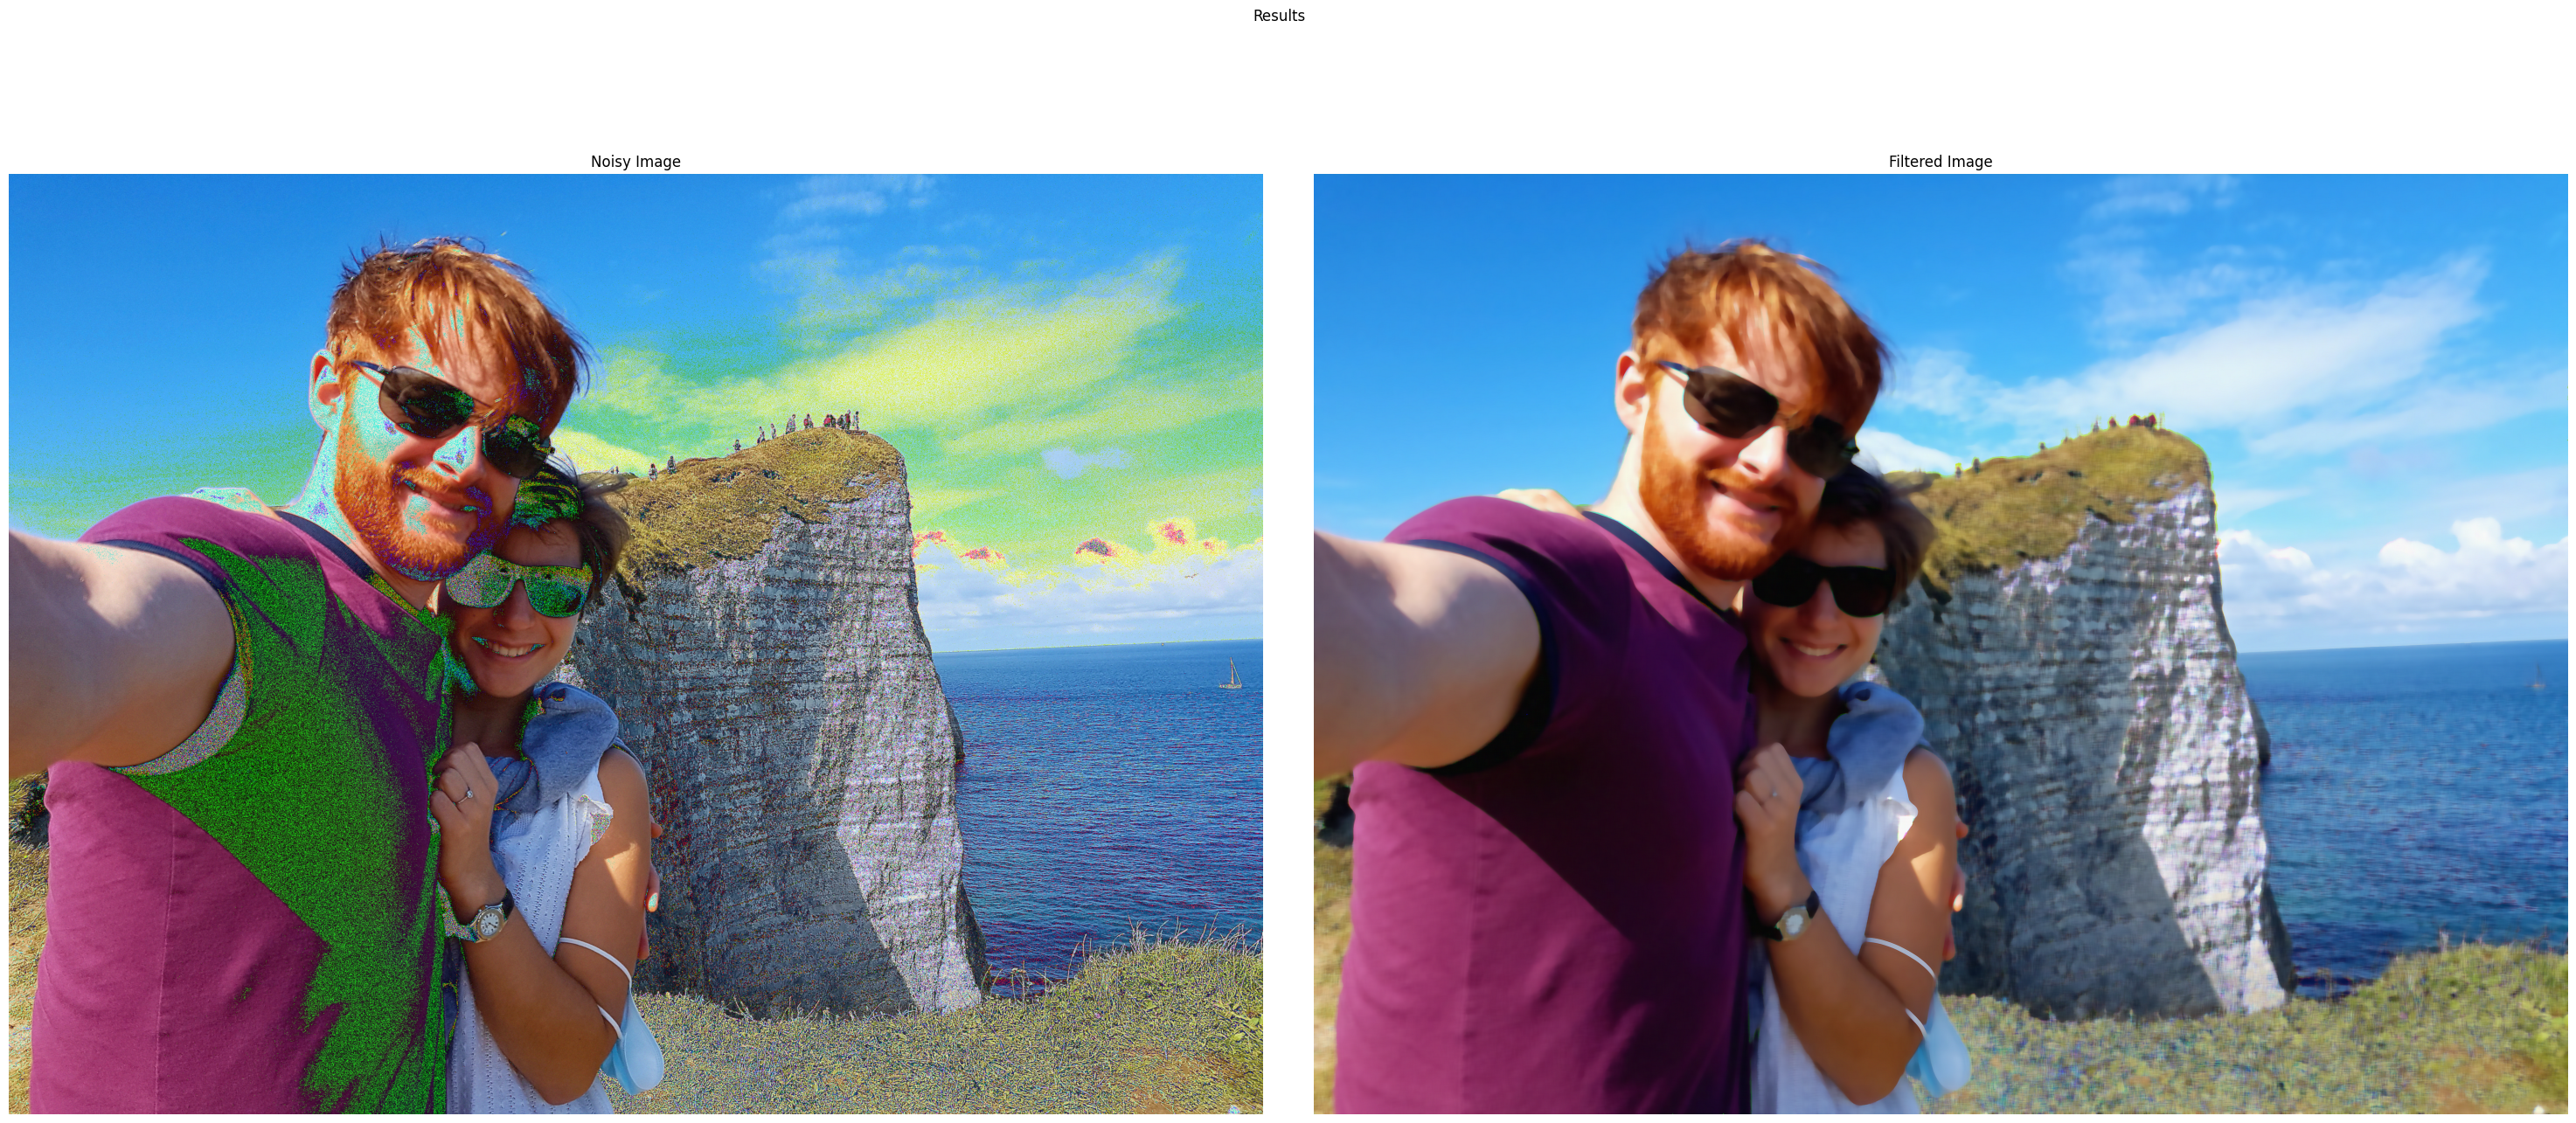

In [158]:
# Create new plots
fig, ax = plt.subplots(1, 2, figsize=(30, 15))

fig.suptitle('Results')
fig.tight_layout()
ax[0].imshow(noisy_image)
ax[0].set_title('Noisy Image')
ax[0].axis('off')
ax[1].imshow(sharpened)
ax[1].set_title('Filtered Image')
ax[1].axis('off')

In [ ]:
# PLOT THE NORMAL DISTRIBUTION

Text(0.5, 1.0, 'Normal Distribution')

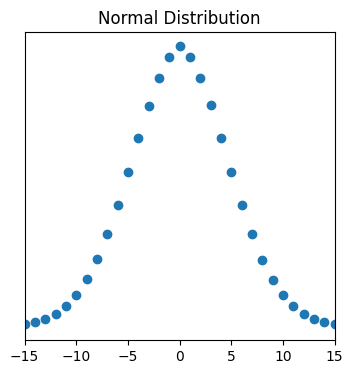

In [90]:
normal_values = np.random.normal(0, 5, (10000000)).astype(np.int8)

value_counts = np.unique(normal_values, return_counts=True)
for index, value in enumerate(value_counts[0]):
  if value == 0:
    value_counts[1][index] /= 2

fig, ax = plt.subplots(figsize=(4, 4))
plt.scatter(value_counts[0], value_counts[1])
plt.xlim(-15, 15)
ax.axes.yaxis.set_visible(False)
plt.title('Normal Distribution')
